In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

/home/tau/aszatkow/miniforge3/envs/LAI/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define the shape of the tensor
shape = (3, 2, 3, 7, 5)

# Create a random tensor of the given shape
tensor = np.random.rand(*shape)

In [3]:
lst_frac=[1,5,10,25,50,75,100]
D_model={0:"NOGENMODEL_BASELINE", 1:"PCA-DDPM", 2:"BERNOULLI"}
#D_model={x:[] for x in lst_model}
D_title={0:"AFR",1:"EAS",2:"EUR"}
#lst_model=["NOGENMODEL_BASELINE", "PCA-DDPM","BERNOULLI"]
#D_model={x:[] for x in lst_model}
        

for i in D_model:
    model=D_model[i]
    for k,pop_idx in enumerate(D_title):
        for l,frac in enumerate(lst_frac):
            #print(model,D_title[pop_idx],frac)
            f=open(f"DATA_AUG_{model}_bootstrap_mult=4_TRAIN_frac_size={frac}%_multipleITER_differentRDMsplit_v2.txt","r")
            f=np.array([x.strip("\n") for x in f.readlines() if "@" not in x and "EVALUATION" not in x])

            tensor[i,0,k,l]=np.array([float(x.split(":")[1]) for x in f[np.arange(pop_idx+1,len(f),8)]]) #AFR,EAS,EUR
            tensor[i,1,k,l]=np.array([float(x.split(":")[1]) for x in f[np.arange(pop_idx+5,len(f),8)]]) #AFR,EAS,EUR


# i : models ie NOGENMODEL_BASELINE, PCA-DDPM, BERNOULLI
# j : generations ie gen30, gen60
# k : populations ie AFR, EAS, EUR
# l : fractions of training set ie 1, 5, 10, 25, 50, 75, 100
# m : iterations, up to 5


In [4]:
x=[12,90,198,502,1036,1570,2136] # see the readme data aug (ce sont les valeurs absolues)

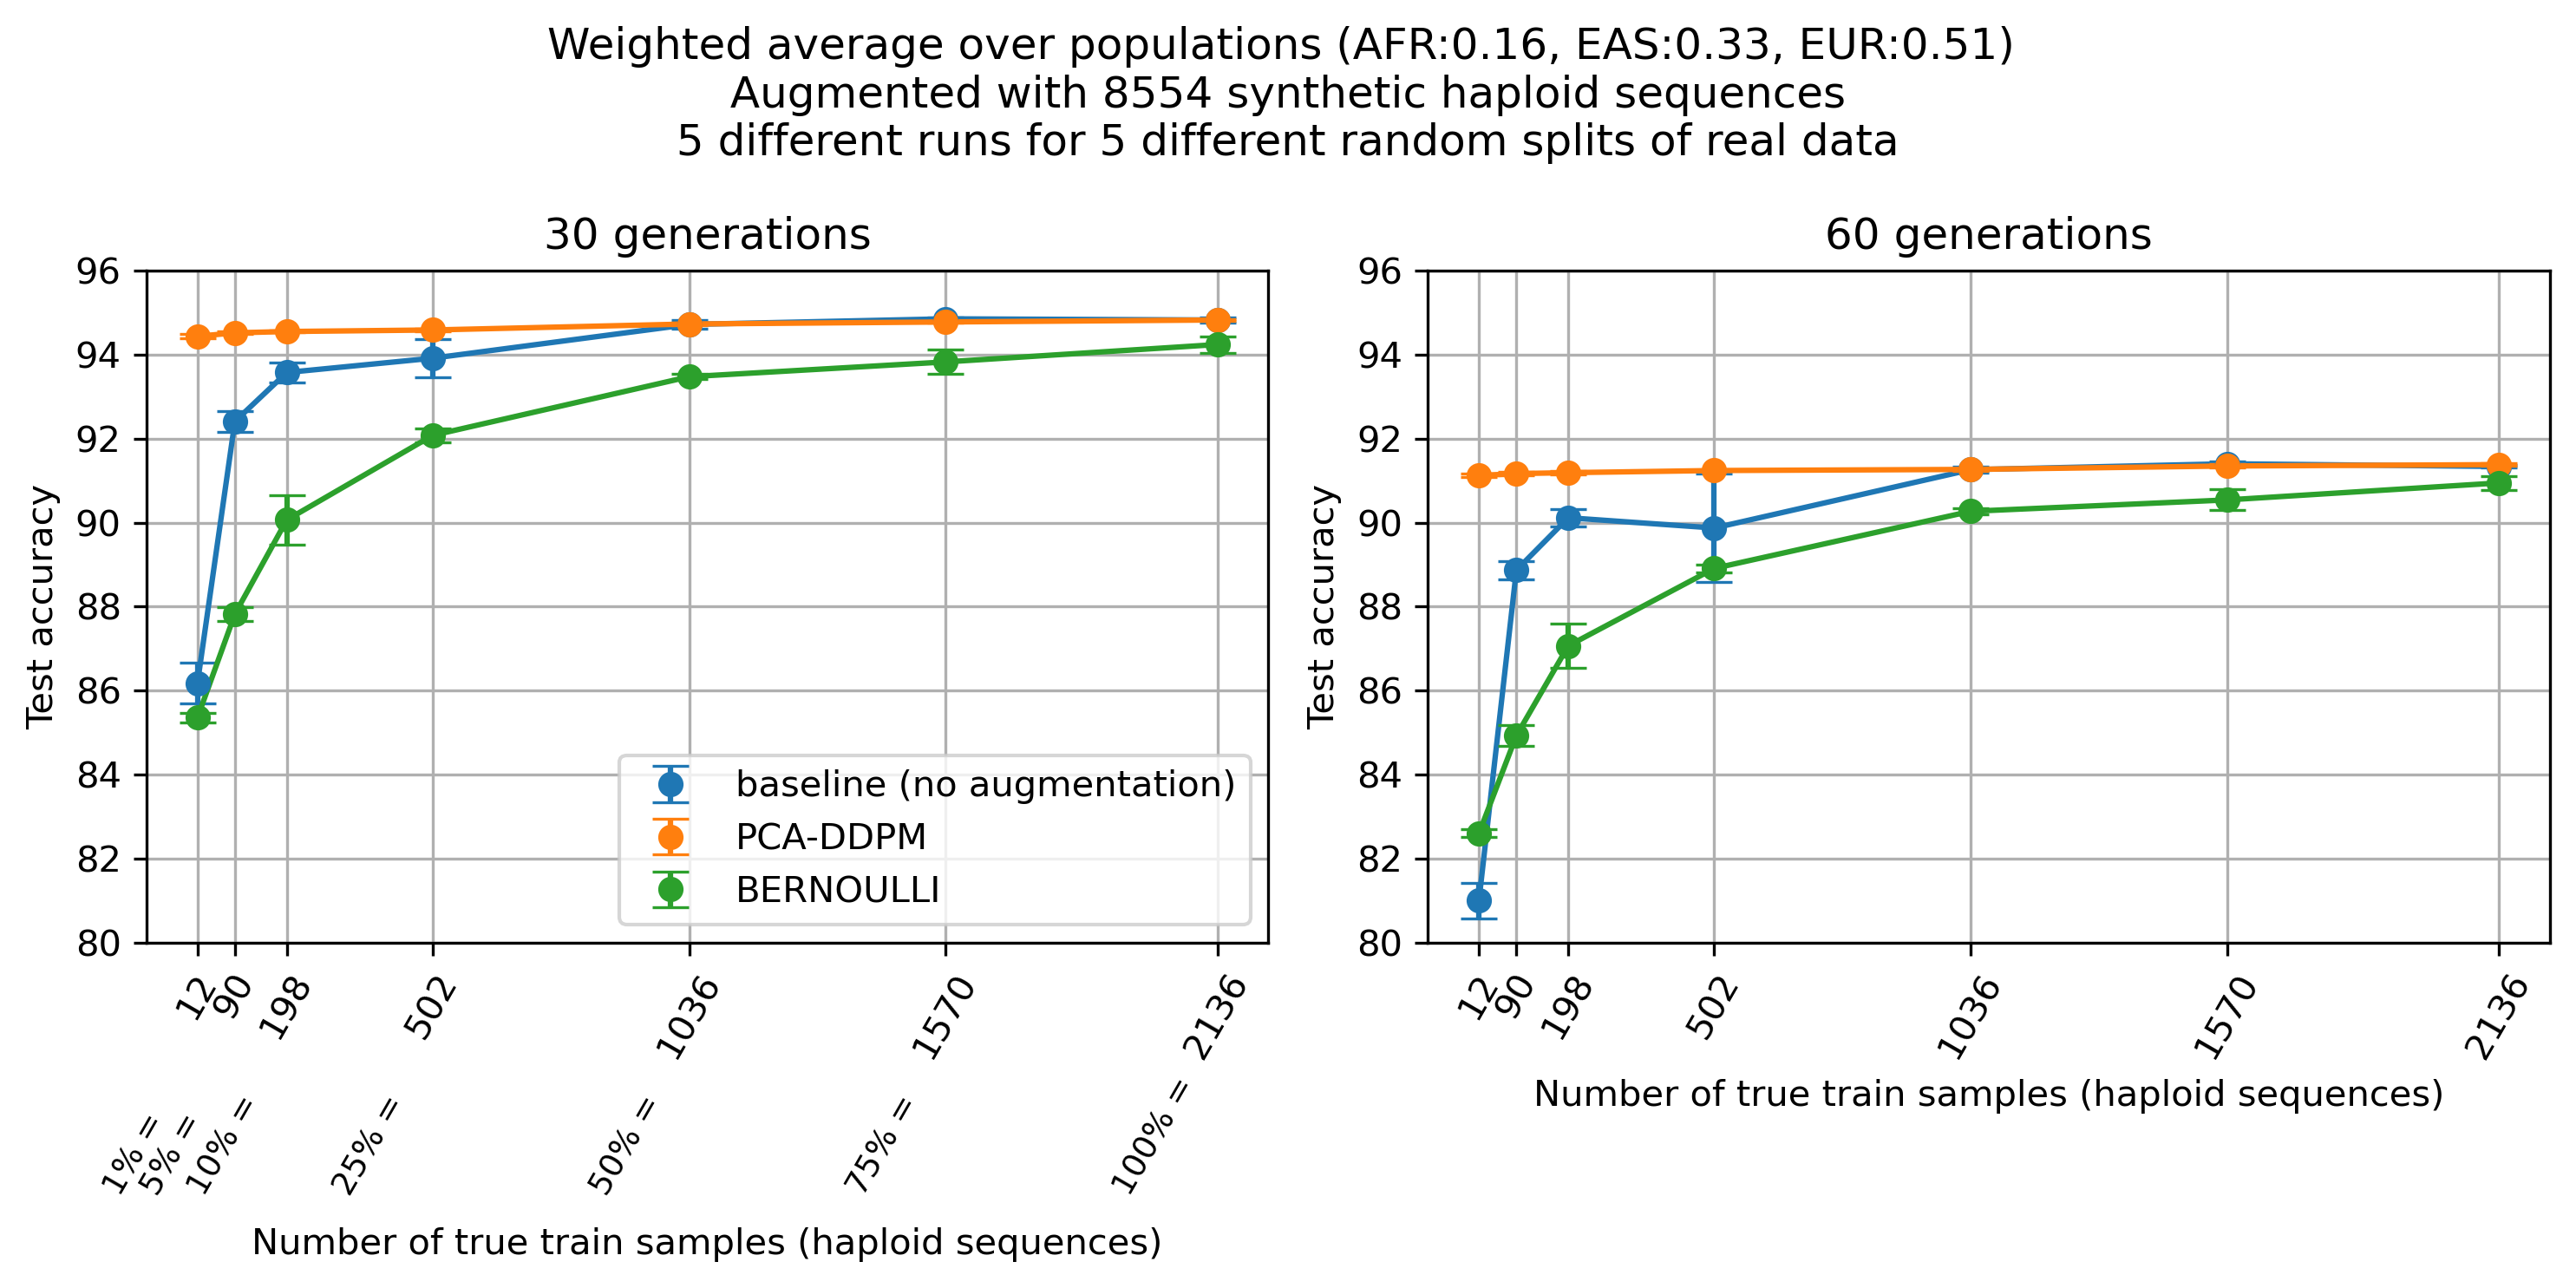

In [13]:
plt.rcParams.update({'font.size': 10})
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,5),dpi=300,facecolor="white")
weights=np.array([0.16,0.33,0.51])

for row in range(2):
    for i in D_model:
        model=D_model[i]
        
        tmp=tensor[i,row,:,:,:].T@weights
        means=np.mean(tmp,axis=0)
        std=np.std(tmp,axis=0)
        
        if model=="NOGENMODEL_BASELINE": model="baseline (no augmentation)"
        
        ax[row].errorbar(x, means, yerr=std, fmt='o', capsize=5, capthick=0.8, label=f'{model}')
        ax[row].plot(x, means, color=f"C{i}")

        
        ax[row].set_xticks(x, x, rotation=60)
        ax[row].set_xlabel("Number of true train samples (haploid sequences)")
        ax[row].set_ylabel("Test accuracy")
        if row==0:ax[row].set_title(f"30 generations")
        else:ax[row].set_title(f"60 generations")
    
    ax[row].set_ylim([80,96])
    ax[row].grid()
        
plt.suptitle("Weighted average over populations (AFR:0.16, EAS:0.33, EUR:0.51) \n Augmented with 8554 synthetic haploid sequences \n 5 different runs for 5 different random splits of real data ")
ax[0].set_xlabel("Number of true train samples (haploid sequences)", labelpad=45)  # Method 1: Adjust labelpad
ax[0].legend(loc="lower right")
fig.tight_layout()

lst_frac_str = ["1% =", "5% =", "10% =", "25% =", "50% =", "75% =", "100% ="]
# Add custom labels (lst_frac) below the x-ticks for the first plot
#some_offset=10
for idx, frac in enumerate(lst_frac_str):
    ax[0].text(x[idx]-130, 74, frac, ha='center', fontsize=9,rotation=60)  # Placing the text below x-axis
#    ax[0].text(x[idx]-130, ax[0].get_ylim()[0] - some_offset, frac, ha='center', fontsize=9, rotation=60)

#ax[0].xaxis.set_label_coords(0.5, -0.9)  # Method 2: Manual coordinates
